# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


In [3]:
print(cities)

['adamstown', 'albany', "pristen'", 'olonkinbyen', 'huocheng', 'tiksi', 'ii', 'puerto natales', 'whitehorse', 'invercargill', 'margaret river', 'mount isa', 'mineros', 'al kut', 'eusebio ayala', 'yellowknife', 'port-aux-francais', 'kodiak', 'stanley', 'kangding', 'hechuan', 'tambura', 'atafu village', 'sisimiut', 'nueva guinea', 'mildura', 'kita', 'lompoc', 'blackmans bay', 'itamaraca', 'vilyuchinsk', 'odienne', 'vorgashor', 'verkhnevilyuysk', 'isabela', 'iqaluit', 'phalaborwa', 'selfoss', 'petropavlovsk-kamchatsky', 'alofi', 'kodoli', 'crane', 'sabang', 'nemuro', 'papatowai', 'tolanaro', 'tongchuanshi', 'waitangi', 'college', 'tangalle', 'port augusta', 'edinburgh of the seven seas', 'el kala', 'hailar', 'sterling', 'vingt cinq', 'lazaro cardenas', 'ushuaia', 'ancud', 'utrik', 'tocopilla', 'minas de marcona', 'isafjordur', 'ust-nera', 'toropets', 'aykhal', 'tayu', 'iskateley', 'hermanus', 'bethel', 'badger', 'arapgir', 'dryden', 'namibe', 'port elizabeth', 'i-n-salah', 'derzhavinsk', 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 10 == 0 and i >= 10):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&units=metric&q={city}&appid={weather_api_key}"
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | pristen'
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | huocheng
City not found. Skipping...
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | ii
City not found. Skipping...
Processing Record 8 of Set 1 | puerto natales
Processing Record 9 of Set 1 | whitehorse
Processing Record 10 of Set 1 | invercargill
Processing Record 0 of Set 2 | margaret river
Processing Record 1 of Set 2 | mount isa
Processing Record 2 of Set 2 | mineros
Processing Record 3 of Set 2 | al kut
Processing Record 4 of Set 2 | eusebio ayala
Processing Record 5 of Set 2 | yellowknife
Processing Record 6 of Set 2 | port-aux-francais
Processing Record 7 of Set 2 | kodiak
Processing Record 8 of Set 2 | stanley
Processing Record 9 of Set 2 | kangding
Processing Record 0 of Set 3 | hechuan
Processing Record 1 o

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=["City", "Lat","Lng" ,"Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"])

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_data_df['Timestamp'] =""
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Timestamp
City_ID,,,,,,,,,,
0,adamstown,-25.0660,-130.1015,18.89,64,71,9.10,PN,1691621624,
1,albany,42.6001,-73.9662,26.36,60,32,4.50,US,1691621625,
2,pristen',51.2355,36.6959,13.65,78,6,3.19,RU,1691621625,
3,olonkinbyen,70.9221,-8.7187,6.07,99,100,4.06,SJ,1691621626,
4,tiksi,71.6872,128.8694,18.71,45,15,3.11,RU,1691621627,


In [13]:
Format_Date = []
for index, row in city_data_df.iterrows():
    date = row['Date']
    dateformat = datetime.fromtimestamp(float(date)).strftime('%Y-%m-%d')
    Format_Date.append(dateformat)
city_data_df['Timestamp'] = Format_Date
city_data_df    


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Timestamp
City_ID,,,,,,,,,,
0,adamstown,-25.0660,-130.1015,18.89,64,71,9.10,PN,1691621624,2023-08-09
1,albany,42.6001,-73.9662,26.36,60,32,4.50,US,1691621625,2023-08-09
2,pristen',51.2355,36.6959,13.65,78,6,3.19,RU,1691621625,2023-08-09
3,olonkinbyen,70.9221,-8.7187,6.07,99,100,4.06,SJ,1691621626,2023-08-09
4,tiksi,71.6872,128.8694,18.71,45,15,3.11,RU,1691621627,2023-08-09
...,...,...,...,...,...,...,...,...,...,...
557,vikhorevka,56.1201,101.1636,14.77,81,100,1.76,RU,1691621929,2023-08-09
558,gangneung,37.7556,128.8961,22.31,98,100,9.43,KR,1691621930,2023-08-09
559,birobidzhan,48.8000,132.9500,19.52,69,100,3.38,RU,1691621651,2023-08-09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

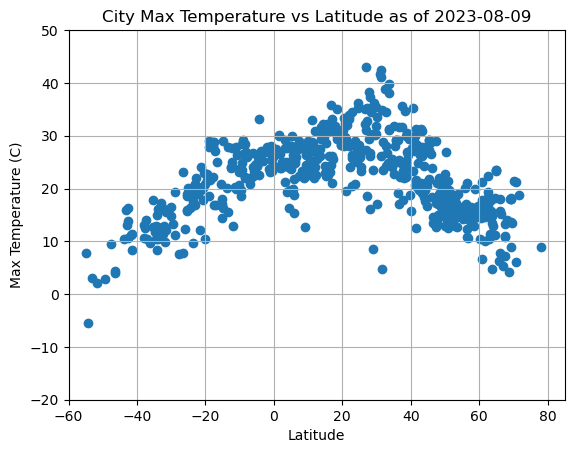

In [17]:
# Build scatter plot for latitude vs. temperature

plt.scatter(data=city_data_df, y = 'Max Temp', x = 'Lat')

# Incorporate the other graph properties
Fig1Title = f"City Max Temperature vs Latitude as of {city_data_df.loc[0,'Timestamp']}"
plt.title(Fig1Title)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.xlim(-60,85)
plt.ylim(-20,50)
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

In [ ]:
city_data_df.columns

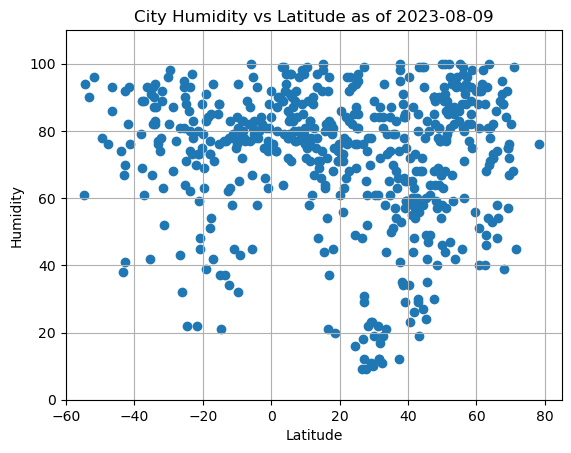

In [18]:
plt.scatter(data=city_data_df, y = 'Humidity', x = 'Lat')

# Incorporate the other graph properties
Fig2Title = f"City Humidity vs Latitude as of {city_data_df.loc[0,'Timestamp']}"
plt.title(Fig2Title)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(-60,85)
plt.ylim(0,110)
plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

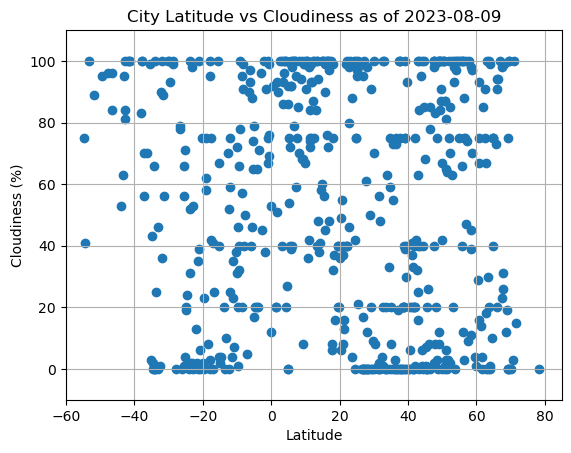

In [19]:
plt.scatter(data=city_data_df, y = 'Cloudiness', x = 'Lat')

# Incorporate the other graph properties
Fig3Title = f"City Latitude vs Cloudiness as of {city_data_df.loc[0,'Timestamp']}"
plt.title(Fig3Title)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-60,85)
plt.ylim(-10,110)
plt.grid()
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

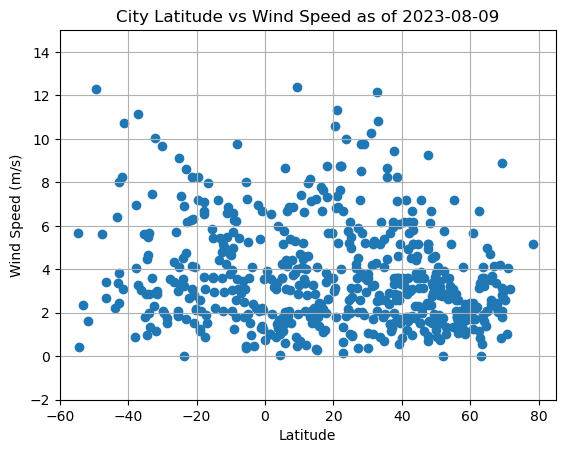

In [20]:
plt.scatter(data=city_data_df, y = 'Wind Speed', x = 'Lat')

# Incorporate the other graph properties
Fig4Title = f"City Latitude vs Wind Speed as of {city_data_df.loc[0,'Timestamp']}"
plt.title(Fig4Title)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.xlim(-60,85)
plt.ylim(-2,15)
plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def linear_regression(x,y):
    result = linregress(x,y)
    plt.plot(x, result.intercept + result.slope*x,'r', label = f"y = {result.intercept} + {result.slope} * x")
    print (f"The r-value is {result.rvalue}")
    

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] >=0])


In [24]:

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Timestamp
City_ID,,,,,,,,,,
1,albany,42.6001,-73.9662,26.36,60,32,4.50,US,1691621625,2023-08-09
2,pristen',51.2355,36.6959,13.65,78,6,3.19,RU,1691621625,2023-08-09
3,olonkinbyen,70.9221,-8.7187,6.07,99,100,4.06,SJ,1691621626,2023-08-09
4,tiksi,71.6872,128.8694,18.71,45,15,3.11,RU,1691621627,2023-08-09
6,whitehorse,60.7161,-135.0538,21.17,40,75,5.66,CA,1691621553,2023-08-09


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df['Lat'] <0])
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Timestamp
City_ID,,,,,,,,,,
0,adamstown,-25.0660,-130.1015,18.89,64,71,9.10,PN,1691621624,2023-08-09
5,puerto natales,-51.7236,-72.4875,2.13,96,89,1.61,CL,1691621628,2023-08-09
7,invercargill,-46.4000,168.3500,4.45,93,84,2.68,NZ,1691621629,2023-08-09
8,margaret river,-33.9500,115.0667,10.40,83,100,1.99,AU,1691621629,2023-08-09
9,mount isa,-20.7333,139.5000,17.87,45,6,1.54,AU,1691621630,2023-08-09


###  Temperature vs. Latitude Linear Regression Plot

In [29]:
northern_hemi_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date', 'Timestamp'],
      dtype='object')

The r-value is -0.6057157367779057


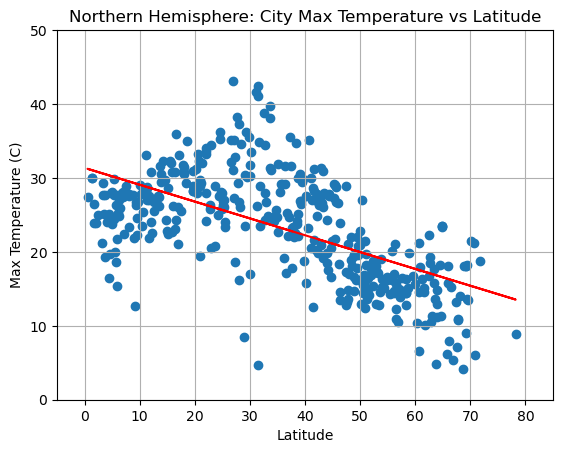

In [31]:
# Linear regression on Northern Hemisphere
plt.scatter(data=northern_hemi_df, y = 'Max Temp', x = 'Lat')

# Incorporate the other graph properties
Fig1Title = f"Northern Hemisphere: City Max Temperature vs Latitude"
plt.title(Fig1Title)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.xlim(-5,85)
plt.ylim(0,50)
plt.grid()

x= northern_hemi_df['Lat']
y= northern_hemi_df['Max Temp']
linear_regression(x,y)


# plt.plot(x, intercept
plt.show()

In [ ]:
# Linear regression on Southern Hemisphere

plt.scatter(data=southern_hemi_df, y = 'Max Temp', x = 'Lat')

# Incorporate the other graph properties
Fig1Title = f"Southern Hemisphere: City Max Temperature vs Latitude"
plt.title(Fig1Title)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.xlim(-60,10)
plt.ylim(0,50)
plt.grid()
plt.legend()
x= southern_hemi_df['Lat']
y= southern_hemi_df['Max Temp']
linear_regression(x,y)


# plt.plot(x, intercept
plt.show()

**Discussion about the linear relationship:
    - Southern Hemi: Per r_value, City Max Temp and Latitude has a strong positive correlation.
    - Norththern Hemi: Per r-value, City Max Temp and Latitude has a weak negative correlation. 

### Humidity vs. Latitude Linear Regression Plot

In [21]:
# Northern Hemisphere
plt.scatter(data=northern_hemi_df, y = 'Humidity', x = 'Lat')

# Incorporate the other graph properties
Fig1Title = f"Northern Hemisphere: Humidity vs Latitude as of {city_data_df.loc[0,'Timestamp']}"
plt.title(Fig1Title)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(-10,85)
plt.ylim(0,115)
plt.grid()
x= northern_hemi_df['Lat']
y= northern_hemi_df['Humidity']
linear_regression(x,y)


# plt.plot(x, intercept
plt.show()

NameError: name 'northern_hemi_df' is not defined

In [ ]:
# Southern Hemisphere
plt.scatter(data=southern_hemi_df, y = 'Humidity', x = 'Lat')

# Incorporate the other graph properties
Fig1Title = f"Sorthern Hemisphere: Humidity vs Latitude"
plt.title(Fig1Title)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.xlim(-60,5)
plt.ylim(0,115)
plt.grid()
x= southern_hemi_df['Lat']
y= southern_hemi_df['Humidity']
linear_regression(x,y)


# plt.plot(x, intercept
plt.show()

**Discussion about the linear relationship:There is no coordination between humidity and latitude for both southern and nothern hemispheres per v-value

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
plt.scatter(data=northern_hemi_df, y = 'Cloudiness', x = 'Lat')

# Incorporate the other graph properties
Fig1Title = f"Northern Hemisphere: Humidity vs Latitude"
plt.title(Fig1Title)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(-10,85)
plt.ylim(0,115)
plt.grid()
x= northern_hemi_df['Lat']
y= northern_hemi_df['Cloudiness']
linear_regression(x,y)


# plt.plot(x, intercept
plt.show()

In [ ]:
# Northern Hemisphere
plt.scatter(data=southern_hemi_df, y = 'Cloudiness', x = 'Lat')

# Incorporate the other graph properties
Fig1Title = f"Southern Hemisphere: Humidity vs Latitude"
plt.title(Fig1Title)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.xlim(-60,5)
plt.ylim(-10,115)
plt.grid()
x= southern_hemi_df['Lat']
y= southern_hemi_df['Cloudiness']
linear_regression(x,y)


# plt.plot(x, intercept
plt.show()

**Discussion about the linear relationship:There is no coordination between cloudiness and latitude for both southern and nothern hemispheres per v-value

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
plt.scatter(data=northern_hemi_df, y = 'Wind Speed', x = 'Lat')

# Incorporate the other graph properties
Fig1Title = f"Northern Hemisphere: Wind Speed vs Latitude"
plt.title(Fig1Title)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(-0,80)
plt.ylim(-2,15)
plt.grid()
x= northern_hemi_df['Lat']
y= northern_hemi_df['Wind Speed']
linear_regression(x,y)


# plt.plot(x, intercept
plt.show()

In [ ]:
plt.scatter(data=southern_hemi_df, y = 'Wind Speed', x = 'Lat')

# Incorporate the other graph properties
Fig1Title = f"Northern Hemisphere: Wind Speed vs Latitude"
plt.title(Fig1Title)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.xlim(-60,5)
plt.ylim(-2,15)
plt.grid()
x= southern_hemi_df['Lat']
y= southern_hemi_df['Wind Speed']
linear_regression(x,y)


# plt.plot(x, intercept
plt.show()

**Discussion about the linear relationship:There is no correlation between wind speed and latitude for both southern and nothern hemispheres per v-value.